# Online Shoppers Purchasing Intension
利用不同的方法與模型來預測消費者網購的行為


### 可帶來的用途

**利用找出消費者的消費習慣與模式，能更加精準的投放廣告**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df=pd.read_csv('./online_shoppers_intention.csv')


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


查看dataset的資料型態

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

將month 從英文簡寫轉為數字

In [5]:
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month']=df['Month'].map(month_map)
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11,3,2,1,2,New_Visitor,True,False


將visitor type轉換型態

Returning_Vistor轉為1

New_Vistor轉為0

In [7]:
vistor_map={'Returning_Visitor':1,'New_Visitor':0}
df['VisitorType']=df['VisitorType'].map(vistor_map)
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1.0,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1.0,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1.0,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1.0,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11,3,2,1,2,0.0,True,False


In [8]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                float64
Weekend                       bool
Revenue                       bool
dtype: object

* **"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.  
  * 上面這幾項feature代表使用者在各類別點擊的次數以及停留的時間。
  
    
* The **"Bounce Rate"**, "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
  * **Bounce Rate**代表使用者在點進這個購物網站的其中一個頁面後馬上離開的比例，可以說明有可能是誤觸的比例。


* The value of **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
  * **Exit Rate**代表此網站是最後被瀏覽的比例，ex:有五次上網都有經過網站A，但只有一次是瀏覽完網站A後便結束瀏覽器，這樣的**Exit Rate**是0.2
  
  
* The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
  * **Page Value**代表使用者在進行線上購物前平均會瀏覽的網頁次數。
  
  
* The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
  * **Special Day**代表是否接近節日的檔期，可能剛好網站有做促銷，造成買氣的增加或是購物的數量變動。
  
  
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


* **Revenue**代表是否有成功交易，可用來作為classification的依據。

## 利用圖表觀察哪一項feature與購買的相關度最高



可以發現Page Values和Revenue有0.49的相關性是所有特徵中單項最高的


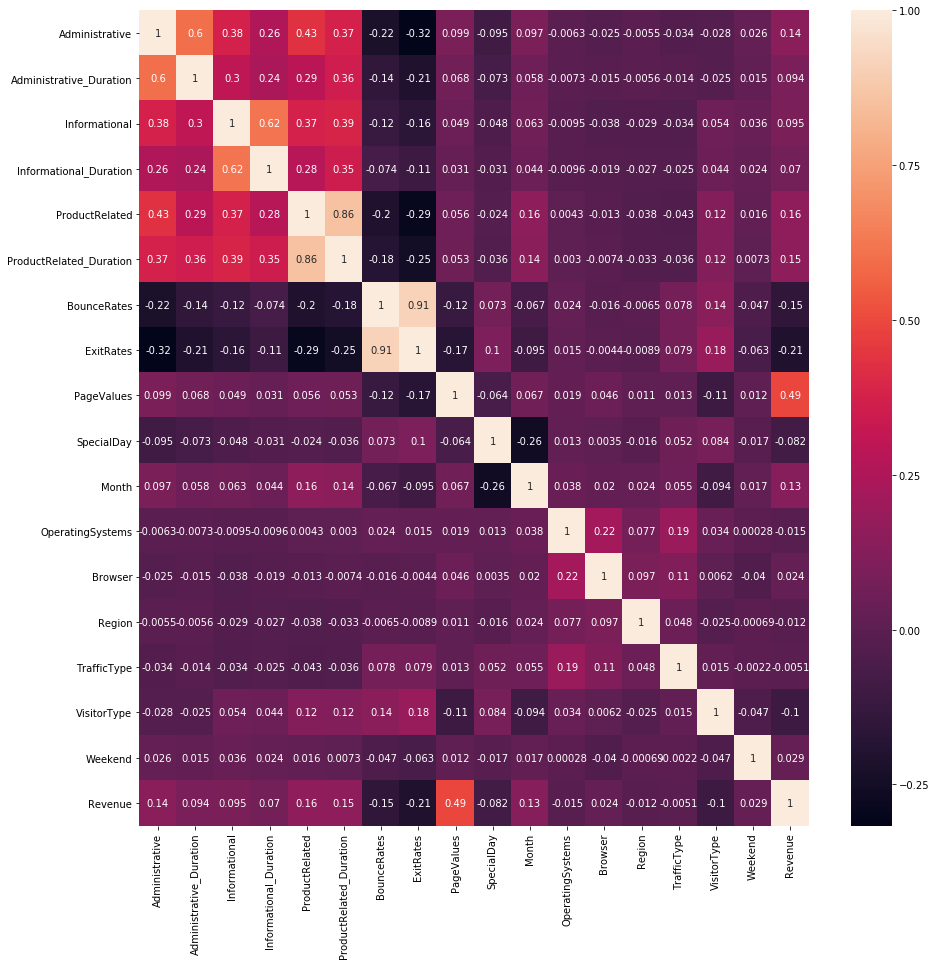

In [13]:
heatmap_in=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_in,xticklabels=heatmap_in.columns,yticklabels=heatmap_in.columns,annot=True)

## 觀察哪個月的瀏覽數量是最多的並找出銷量最好的一個月


五月是這個購物網站瀏覽次數最多的一個月，二月則是最少的。

對於這個結果我猜是因為，五月可能大家都想買母親節禮物，而二月剛好是天數最少的一個月。

In [15]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

但沒想到成交次數最多的竟然是11月，當月一共有760筆成功的交易。

In [18]:
df['Purchase Count']=pd.Series(np.ones(len(df)),index=df.index)
PurchaseCount=df.groupby(['Month','Revenue']).agg({'Purchase Count':'sum'})
PurchaseCount=PurchaseCount.sort_values(by=['Purchase Count'],ascending=False)
PurchaseCount

,,Purchase Count
Month,Revenue,
5,False,2999.0
11,False,2238.0
3,False,1715.0
12,False,1511.0
11,True,760.0
10,False,434.0
7,False,366.0
5,True,365.0
9,False,362.0


## 對於消費者的行為進行預測

###  1. 先藉由上述的兩個特徵來預測消費者的購物行為，分別利用Month和Page Values。